**IMPORT DATA AND LIBRARY YOU NEEDED**

In [0]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/qaidin/Prediksi-Omset-UMKM-Kota-Bandung/master/dataset_hasil_features_selection/datasetumkmbandung%20(1).csv'
df = pd.read_csv(url,usecols=[0,1,2,3,4,5])



**JUST FOR OVERVIEW THE DATA**

In [2]:
df.tail()

,Kecamatan,Jumlah Karyawan,Aset,Omset,Tahun Berdiri,Keterangan
5214,Ujungberung,-,-,120000000,2016,-
5215,Ujungberung,-,-,-,2016,-
5216,Ujungberung,2,5000000,40000000,2013,-
5217,Ujungberung,-,-,-,-,-
5218,Ujungberung,-,-,-,-,-


**START TO TAKE A LOOK FOR UNEXPECTED ERROR DATA TYPE VALUE**

> replace '-' character with nan value

> it looks like every column has that unexpected character

> lets do some replace







In [0]:
df['Jumlah Karyawan'].replace('-',np.nan,inplace=True)

In [0]:
df['Aset'].replace('-',np.nan,inplace=True)


In [0]:
df['Omset'].replace('-',np.nan,inplace=True)


In [0]:
df['Tahun Berdiri'].replace('-',np.nan,inplace=True)


In [0]:
df['Keterangan'].replace('-',np.nan,inplace=True)

**DROP ANY VALUES WHO HAS NAN VALUE**

> **Why we do that ?**

1.   we are not going to fill  the NAN values with any method, because it will affect the authenticity of the data,  on the other hand there's 2000 rows nan value on  'Jumlah Karyawan' column **so what do you expected ?** fill that with mean ? nope. better drop it 
   





In [0]:
df.dropna(how='any', inplace=True)

**NOW WE GOT CLEAN DATA WITHOUT NULL VALUE**

In [9]:
df.isnull().sum()

Kecamatan          0
Jumlah Karyawan    0
Aset               0
Omset              0
Tahun Berdiri      0
Keterangan         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2366 entries, 0 to 5204
Data columns (total 6 columns):
Kecamatan          2366 non-null object
Jumlah Karyawan    2366 non-null object
Aset               2366 non-null object
Omset              2366 non-null object
Tahun Berdiri      2366 non-null object
Keterangan         2366 non-null object
dtypes: object(6)
memory usage: 129.4+ KB


**FEATURE ENGINEERING IS NOT FINISH YET**

1.   we cannot convert data types string to int with unexpected character
2.   ','  '_' '.' are the problem so lets do some replace function again 



In [0]:
df['Aset'] = df['Aset'].str.replace(',','')
df['Aset'] = df['Aset'].str.replace('.','')


In [0]:
df['Omset'] = df['Omset'].str.replace(',','')
df['Omset'] = df['Omset'].str.replace('.','')

In [0]:
df['Tahun Berdiri'] = df['Tahun Berdiri'].str.replace('35 Tahun','1983')

In [0]:
df['Tahun Berdiri'] = df['Tahun Berdiri'].str.replace('_','1990')

**AND FINALLY CONVERT STR/OBJECT TO INT OR FLOAT**

In [0]:
df['Tahun Berdiri'] = df['Tahun Berdiri'].astype(int)

In [0]:
for ind,row in df.iterrows():
  df.loc[ind,'Lama Berdiri(Tahun)'] = 2019 - row['Tahun Berdiri'] 

In [0]:
df['Omset']=df['Omset'].astype(float)
df['Aset']=df['Aset'].astype(float)
df['Jumlah Karyawan']=df['Jumlah Karyawan'].astype(int)



In [0]:
df.drop('Tahun Berdiri',axis = 1,inplace=True)

In [19]:
df.head()

,Kecamatan,Jumlah Karyawan,Aset,Omset,Keterangan,Lama Berdiri(Tahun)
0,Andir,2,3000000.0,9000000.0,Mikro,34.0
1,Andir,2,3000000.0,4200000.0,Mikro,20.0
2,Andir,2,3000000.0,9000000.0,Mikro,29.0
3,Andir,2,20000000.0,9000000.0,Mikro,42.0
4,Andir,0,3000000.0,9000000.0,Mikro,22.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2366 entries, 0 to 5204
Data columns (total 6 columns):
Kecamatan              2366 non-null object
Jumlah Karyawan        2366 non-null int64
Aset                   2366 non-null float64
Omset                  2366 non-null float64
Keterangan             2366 non-null object
Lama Berdiri(Tahun)    2366 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 209.4+ KB


**YOU THINK WE'RE DONE ?, SHAME ON YOU**

> **look at this inconcistent data**


> **it should be at least 3 chategorical data**

1.   Kecil
2.   Menengah
3.   Mikro

> **the question is what am i supposed to do with that ?


*   of course do some feature engineering again
*   replace Kecil* : Kecil, Mikro*:Mikro, mikro:Mikro, kecil:Kecil, -No:Mikro, MikroNo : Mikro, KecilNo : Kecil, No:Kecil.


**whoever input this data, you such a lazy person.**
















In [0]:
level_map = {'Kecil':'Kecil','Mikro':'Mikro','Menengah':'Menengah','Kecil*': 'Kecil', 'Mikro*': 'Mikro', 'mikro': 'Mikro', 'kecil':'Kecil','-No':'Kecil','MikroNo':'Mikro','KecilNo':'Kecil','No':'Kecil'}

df['Kategori Usaha'] = df['Keterangan'].map(level_map)


In [0]:
df.drop('Keterangan',axis=1,inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns = ['Kategori Usaha'])


In [49]:
df.Omset.mean()

90720441.88503803

In [24]:
df.isna().sum()

Kecamatan                  0
Jumlah Karyawan            0
Aset                       0
Omset                      0
Lama Berdiri(Tahun)        0
Kategori Usaha_Kecil       0
Kategori Usaha_Menengah    0
Kategori Usaha_Mikro       0
dtype: int64

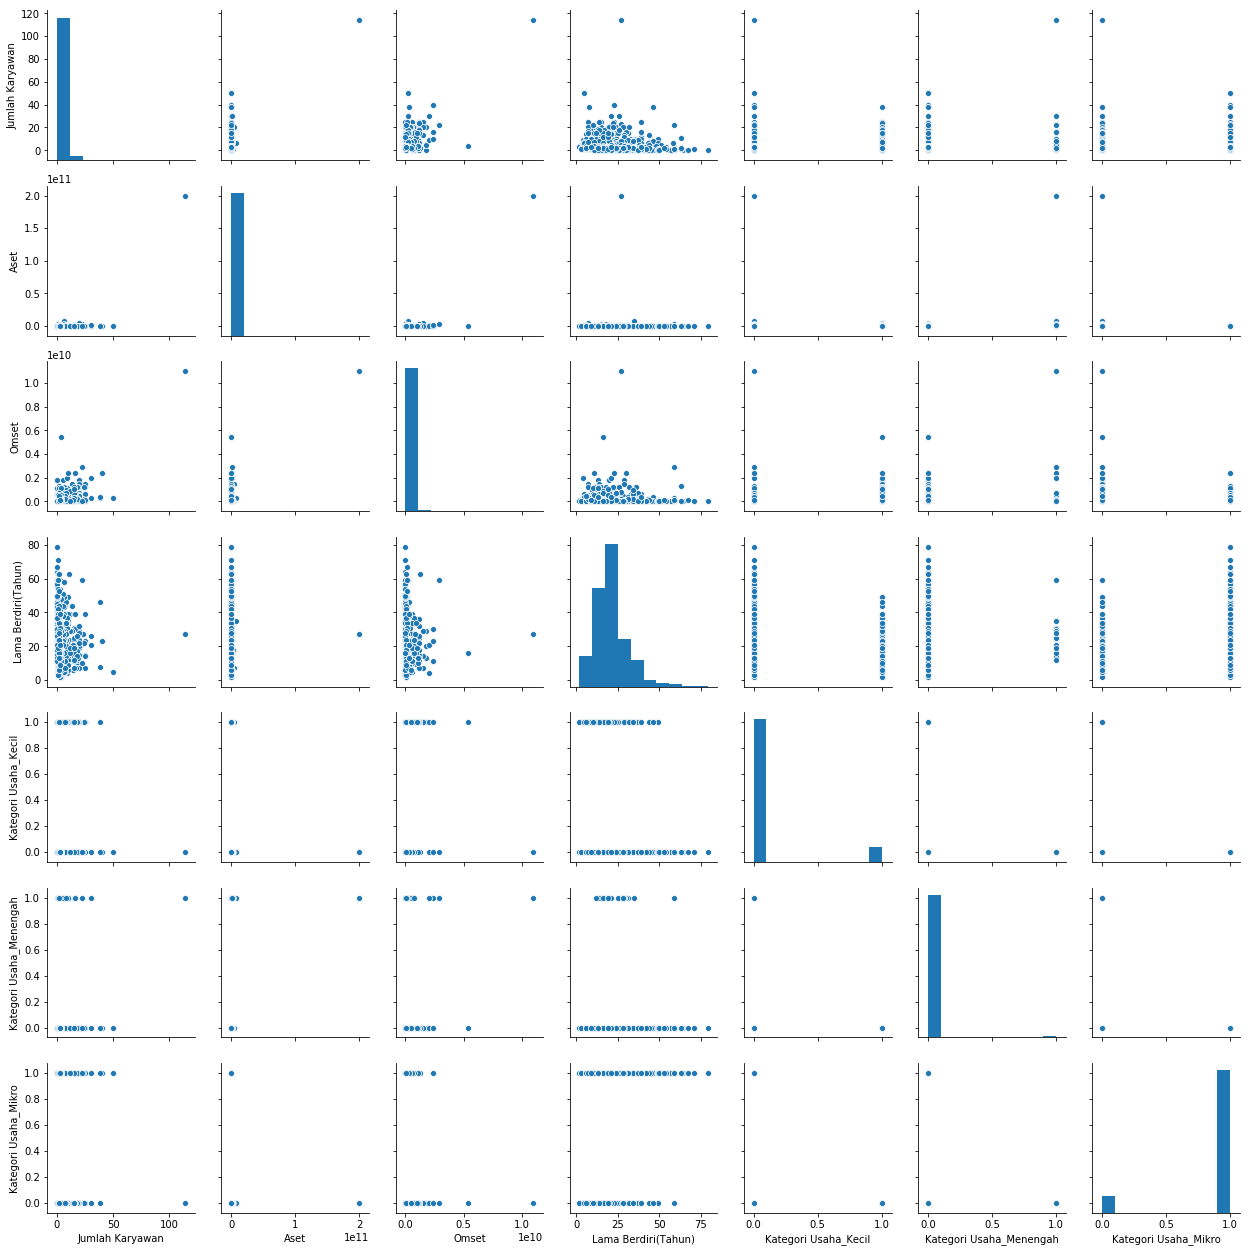

In [0]:
import seaborn as sns
sns.pairplot(df)

In [0]:
df.corr(method='pearson')

,Jumlah Karyawan,Aset,Omset,Lama Berdiri(Tahun),Kategori Usaha_Kecil,Kategori Usaha_Menengah,Kategori Usaha_Mikro
Jumlah Karyawan,1.000000,0.520551,0.650428,-0.076354,0.260279,0.243455,-0.320860
Aset,0.520551,1.000000,0.698503,0.012289,0.004451,0.258278,-0.077698
Omset,0.650428,0.698503,1.000000,-0.048516,0.284008,0.303797,-0.360952
Lama Berdiri(Tahun),-0.076354,0.012289,-0.048516,1.000000,-0.041474,0.031194,0.031239
Kategori Usaha_Kecil,0.260279,0.004451,0.284008,-0.041474,1.000000,-0.028662,-0.958810
Kategori Usaha_Menengah,0.243455,0.258278,0.303797,0.031194,-0.028662,1.000000,-0.256451
Kategori Usaha_Mikro,-0.320860,-0.077698,-0.360952,0.031239,-0.958810,-0.256451,1.000000


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

x = df[['Jumlah Karyawan','Aset','Lama Berdiri(Tahun)','Kategori Usaha_Kecil','Kategori Usaha_Menengah','Kategori Usaha_Mikro']]
y = df['Omset']
y=y.values.reshape(-1,1)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit_transform(x)
scaler_y.fit_transform(y)
#xscale=scaler_x.transform(x)
#yscale=scaler_y.transform(y)
xscale = scale(xscale)
yscale = scale(yscale)
x_train, x_test, y_train, y_test = train_test_split(xscale, yscale)
lr = LinearRegression()
lr.fit(x_train,y_train)
ypred = lr.predict(x_test)

In [0]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,max_error

In [57]:
print('Variance score: %.2f' % r2_score(y_test,ypred))

Variance score: 0.36


In [50]:
absolut = mean_absolute_error(y_test, ypred)
absolut

0.23578952415070098

In [51]:
maxerror = max_error(y_test,ypred)
maxerror

5.87944605839256

In [56]:
mse = mean_squared_error(y_test,ypred)
mse

0.31084161709853997

In [58]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,ypred))
rmse

0.5575317184685907